# About Dataset

Features:

RowNumber: The sequential number assigned to each row in the dataset.

CustomerId: A unique identifier for each customer.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The geographical location of the customer (e.g., country or region).

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer has.

HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

EstimatedSalary: The estimated salary of the customer.

Exited: Indicates whether the customer has exited the bank (binary: yes/no).

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
sns.set()

2024-05-29 17:55:41.722691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 17:55:41.722816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 17:55:41.822956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Business Understanding

In [70]:
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Penjelasan
Dari data yang kita import memiliki 10.000 baris dan 14 fitur (columns) dengan masing-masing memiiki typedata yang berbeda

In [71]:
# Menampilkan type data masing-masing fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Penjelasan
Dari hasil diatas kita bisa melihat masing-masing tipe data fitur tersebut seperti int64, object, float64

In [72]:
# Menampilkan ringkasan data berbentuk tipe numerik menggunakan statistik
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Penjelasan
Menampilkan ringkasan dalam bentuk statistik seperti nilai min, max, persentil, mean, dan count khusus untuk fitur numerik

In [73]:
# Mengecek apakah ada nilai yang null di masing-masing fitur
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
# Mengetahui nilai jumlah unik dalam fitur Surname
data["Surname"].value_counts()

Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64

### Penjelasan
Terlihat bahwa pada fitur Surname memiliki banyak nilai yang unik tetapi jumlah nilai unik tertinggi yaitu Smith dengan nilai 32

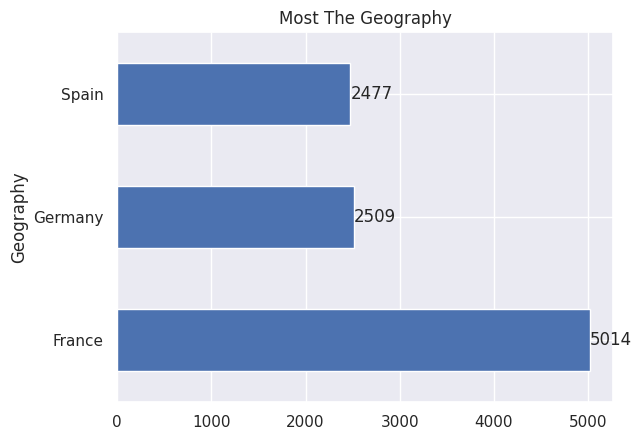

In [76]:
plot = data["Geography"].value_counts()
ax = plot.plot.barh()
ax.set_title("Most The Geography")

for container in ax.containers:
    ax.bar_label(container)

### Penjelasan
Dari hasil analisis tersebut kita bisa lihat bahwa, geography paling banyak ada di negara prancis dan paling rendah ada di spanyol


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


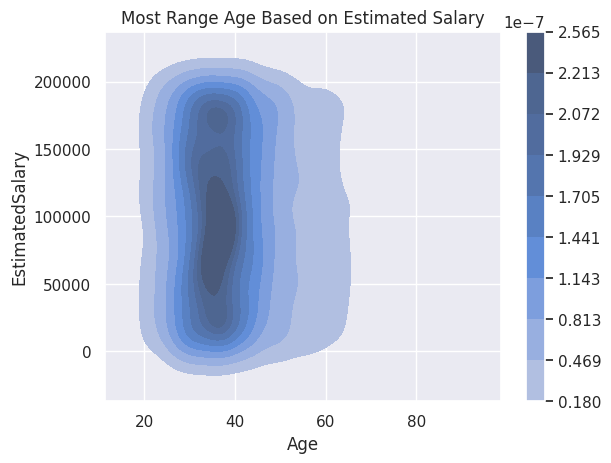

In [78]:
sns.kdeplot(data=data, x="Age", y="EstimatedSalary", cbar=True, fill=True).set(title="Most Range Age Based on Estimated Salary");

### Penjelasan
1. Terlihat bahwa perkiraan gaji paling banyak ada pada jangkauan umur 30 s/d 40 dengan 50.000 s/d 130.000 
2. Gaji paling tinggi juga masih tetap ada pada kisaran umur 30 s/d 40 dengan gaji diatas lebihdari 200.000

Note: Semakin warna biru tua maka nilai semakin tinggi artinya data point berkumpul di suatu titik tersebut, sedangkan warna semakin biru muda maka data point tersebar kemana-mana

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

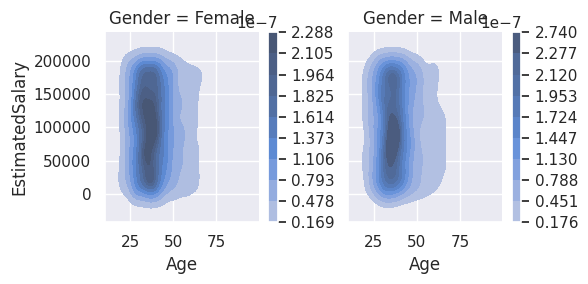

In [10]:
g = sns.FacetGrid(data, col="Gender")
g.map(sns.kdeplot, "Age", "EstimatedSalary", fill=True, cbar=True);

###dasd

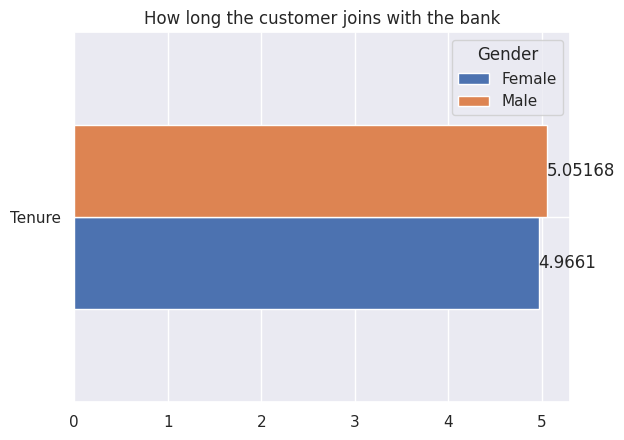

In [11]:
plot = pd.pivot_table(data=data, values="Tenure", columns="Gender", aggfunc="mean")
ax = plot.plot.barh()
ax.set_title("How long the customer joins with the bank")

for container in ax.containers:
    ax.bar_label(container)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

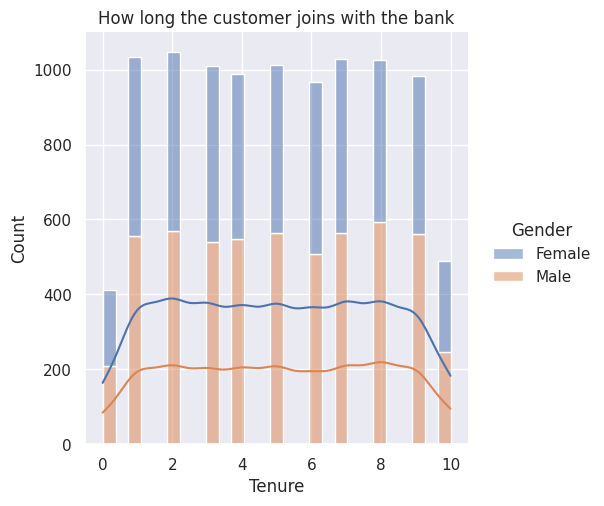

In [12]:
sns.displot(data=data, x="Tenure", hue="Gender", multiple="stack", kde=True).set(title="How long the customer joins with the bank");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


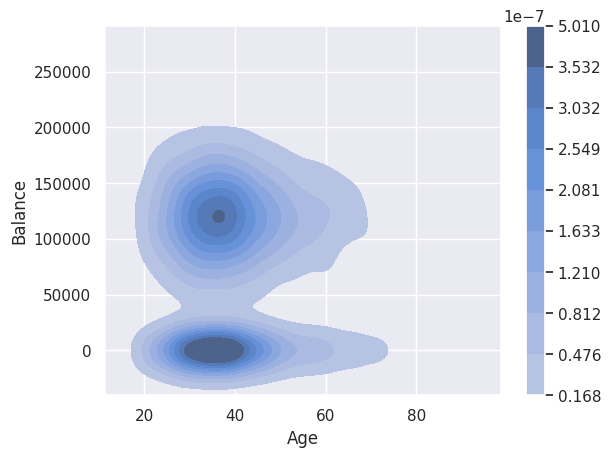

In [13]:
sns.kdeplot(data=data, x="Age", y="Balance", cbar=True, fill=True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

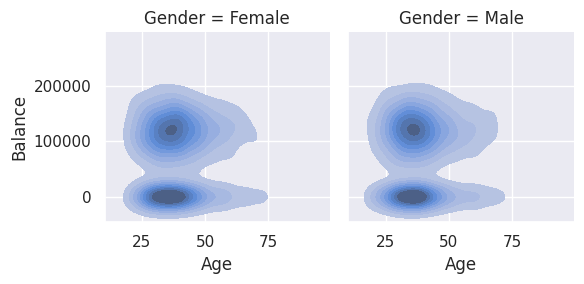

In [14]:
g = sns.FacetGrid(data, col="Gender")
g.map(sns.kdeplot, "Age", "Balance", fill=True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

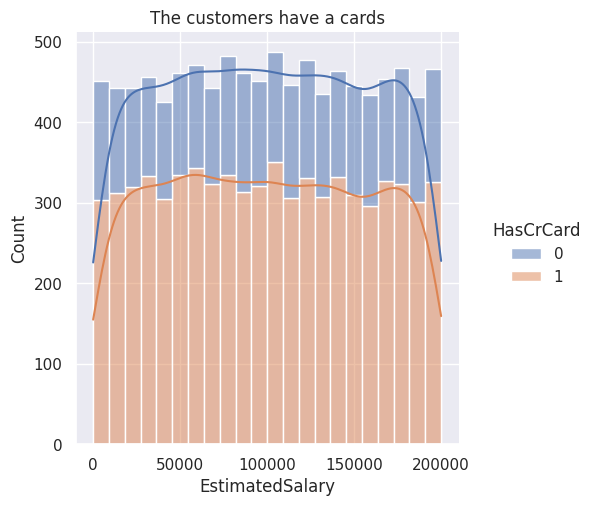

In [15]:
sns.displot(data=data, x="EstimatedSalary", hue="HasCrCard", multiple="stack", kde=True).set(title="The customers have a cards");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


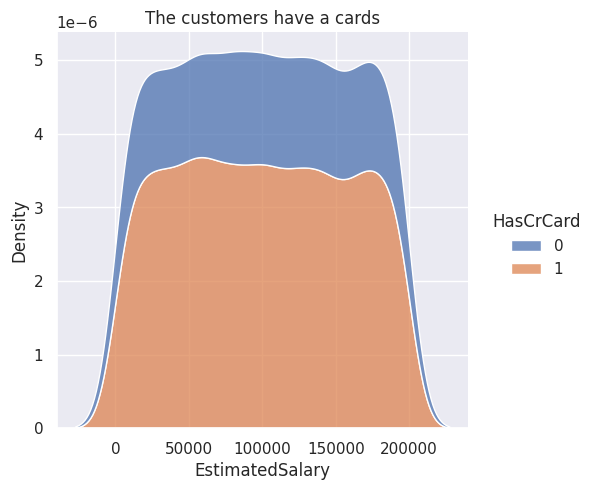

In [16]:
sns.displot(data=data, x="EstimatedSalary", hue="HasCrCard", multiple="stack", kind="kde").set(title="The customers have a cards");

In [17]:
# Umur 19 s/d 40 dewasa awal
# Umur 41 s/d 60 dewasa pertengahan
# Umur 61++ dewasa akhir

# Melakukan Binding data
bins = [19, 40, 60, 100]
labels = ["Early Adulthood", "Middle Adulthood", "Late Adulthood"]
data["AgeCategory"] = pd.cut(data["Age"], bins=bins, labels=labels)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle Adulthood
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle Adulthood
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle Adulthood
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Early Adulthood
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle Adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Early Adulthood
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Early Adulthood
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Early Adulthood
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Middle Adulthood


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


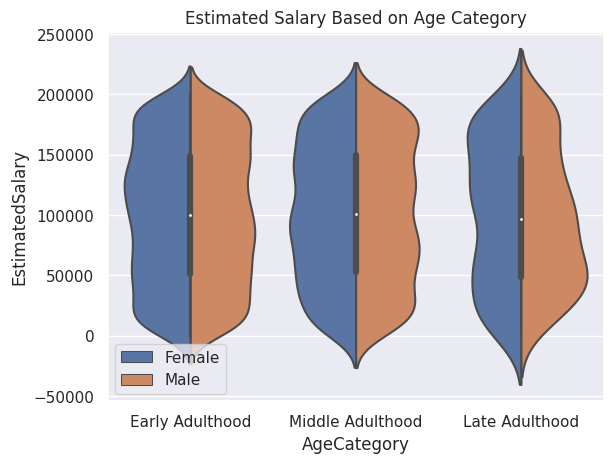

In [18]:
x = sns.violinplot(data=data, x="AgeCategory", y="EstimatedSalary", hue="Gender", split=True);
x.set_title("Estimated Salary Based on Age Category")
x.legend(loc="lower left");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


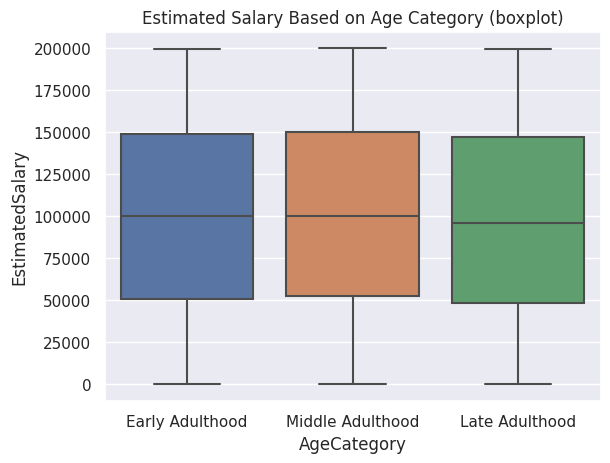

In [19]:
sns.boxplot(data=data, x="AgeCategory", y="EstimatedSalary").set(title="Estimated Salary Based on Age Category (boxplot)");

/tmp/ipykernel_34/442652896.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  plot = pd.pivot_table(data=data, values="IsActiveMember", columns="AgeCategory", aggfunc="mean")


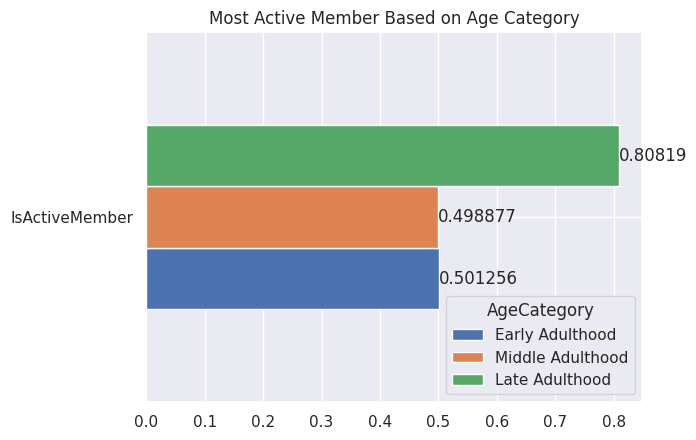

In [20]:
plot = pd.pivot_table(data=data, values="IsActiveMember", columns="AgeCategory", aggfunc="mean")
ax = plot.plot.barh()
ax.set_title("Most Active Member Based on Age Category")

for container in ax.containers:
    ax.bar_label(container)

/tmp/ipykernel_34/3228739140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = data.groupby(["Gender", "AgeCategory"])["NumOfProducts"].mean().unstack()


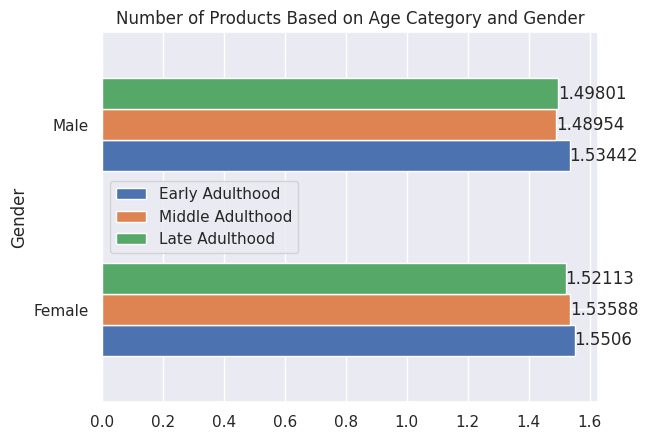

In [21]:
plot = data.groupby(["Gender", "AgeCategory"])["NumOfProducts"].mean().unstack()
ax = plot.plot.barh()
ax.set_title("Number of Products Based on Age Category and Gender")
ax.legend(loc="center left")

for container in ax.containers:
    ax.bar_label(container)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


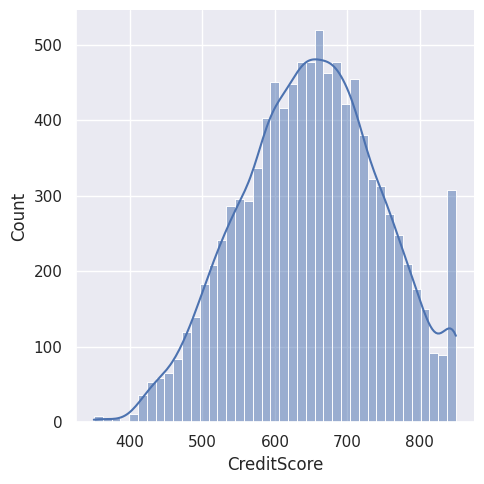

In [22]:
sns.displot(data=data, x="CreditScore", kde=True);

In [23]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle Adulthood
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle Adulthood
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle Adulthood
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Early Adulthood
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle Adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Early Adulthood
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Early Adulthood
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Early Adulthood
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Middle Adulthood


# Data Understanding

In [24]:
# Menghapus fitur yang tidak digunakan
data.drop(["RowNumber", "CustomerId", "Surname", "CreditScore", "Geography"], axis=1, inplace=True)
data

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,Female,42,2,0.00,1,1,1,101348.88,1,Middle Adulthood
1,Female,41,1,83807.86,1,0,1,112542.58,0,Middle Adulthood
2,Female,42,8,159660.80,3,1,0,113931.57,1,Middle Adulthood
3,Female,39,1,0.00,2,0,0,93826.63,0,Early Adulthood
4,Female,43,2,125510.82,1,1,1,79084.10,0,Middle Adulthood
...,...,...,...,...,...,...,...,...,...,...
9995,Male,39,5,0.00,2,1,0,96270.64,0,Early Adulthood
9996,Male,35,10,57369.61,1,1,1,101699.77,0,Early Adulthood
9997,Female,36,7,0.00,1,0,1,42085.58,1,Early Adulthood
9998,Male,42,3,75075.31,2,1,0,92888.52,1,Middle Adulthood


In [25]:
def gender_map(x):
    if x == "Male":
        x = 0
    else:
        x = 1
    return x
data["Gender"] = data["Gender"].map(gender_map)
data

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,1,42,2,0.00,1,1,1,101348.88,1,Middle Adulthood
1,1,41,1,83807.86,1,0,1,112542.58,0,Middle Adulthood
2,1,42,8,159660.80,3,1,0,113931.57,1,Middle Adulthood
3,1,39,1,0.00,2,0,0,93826.63,0,Early Adulthood
4,1,43,2,125510.82,1,1,1,79084.10,0,Middle Adulthood
...,...,...,...,...,...,...,...,...,...,...
9995,0,39,5,0.00,2,1,0,96270.64,0,Early Adulthood
9996,0,35,10,57369.61,1,1,1,101699.77,0,Early Adulthood
9997,1,36,7,0.00,1,0,1,42085.58,1,Early Adulthood
9998,0,42,3,75075.31,2,1,0,92888.52,1,Middle Adulthood


In [26]:
def age_category_map(x):
    if x == "Early Adulthood":
        x = 0
    elif x == "Middle Adulthood":
        x = 1
    else:
        x = 2
    return x
data["AgeCategory"] = data["AgeCategory"].map(age_category_map)
data

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,1,42,2,0.00,1,1,1,101348.88,1,1
1,1,41,1,83807.86,1,0,1,112542.58,0,1
2,1,42,8,159660.80,3,1,0,113931.57,1,1
3,1,39,1,0.00,2,0,0,93826.63,0,0
4,1,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,0,39,5,0.00,2,1,0,96270.64,0,0
9996,0,35,10,57369.61,1,1,1,101699.77,0,0
9997,1,36,7,0.00,1,0,1,42085.58,1,0
9998,0,42,3,75075.31,2,1,0,92888.52,1,1


In [27]:
# Normalisasi data 0 s/d 1 value

# Fitur Age
age = MinMaxScaler()
age.fit(data[["Age"]])
data["Age"] = age.transform(data[["Age"]])

# Fitur Balance
balance = MinMaxScaler()
balance.fit(data[["Balance"]])
data["Balance"] = balance.transform(data[["Balance"]])

# Fitur EstimatedSalary
estimatedSalary = MinMaxScaler()
estimatedSalary.fit(data[["EstimatedSalary"]])
data["EstimatedSalary"] = estimatedSalary.transform(data[["EstimatedSalary"]])
data

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,1,0.324324,2,0.000000,1,1,1,0.506735,1,1
1,1,0.310811,1,0.334031,1,0,1,0.562709,0,1
2,1,0.324324,8,0.636357,3,1,0,0.569654,1,1
3,1,0.283784,1,0.000000,2,0,0,0.469120,0,0
4,1,0.337838,2,0.500246,1,1,1,0.395400,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,0,0.283784,5,0.000000,2,1,0,0.481341,0,0
9996,0,0.229730,10,0.228657,1,1,1,0.508490,0,0
9997,1,0.243243,7,0.000000,1,0,1,0.210390,1,0
9998,0,0.324324,3,0.299226,2,1,0,0.464429,1,1


<Axes: >

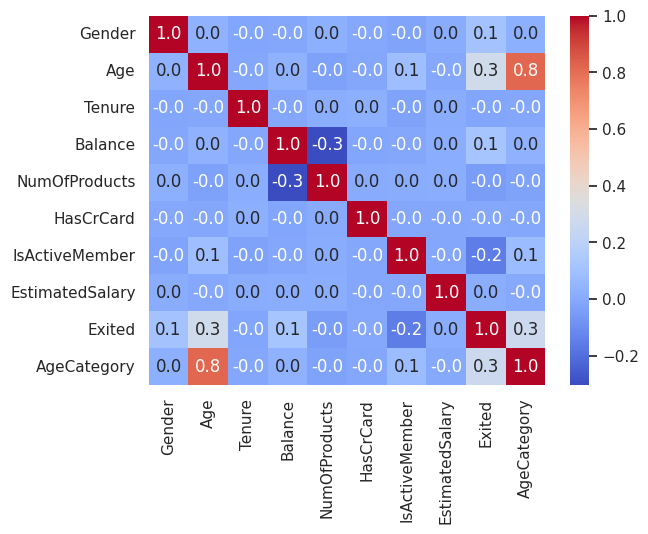

In [28]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="coolwarm", fmt=".1f")

# Modeling

In [29]:
X = data.iloc[:, :8]
y = data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")

X_train = (8000, 8), X_test = (2000, 8), y_train = (8000,), y_test = (2000,)


In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)
y_pred.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
pd.DataFrame({
    "aktual": y_test,
    "prediksi": y_pred
}).head(20)

,aktual,prediksi
2656,0,0
445,0,0
9505,0,0
332,0,0
4168,0,0
2364,0,0
6097,1,0
7,1,1
7752,0,0
4453,0,0


# Evaluate

In [33]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy model random forest = {acc}")

Accuracy model random forest = 0.851


In [34]:
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.73      0.44      0.55       414

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [35]:
report_dict

{'0': {'precision': 0.868421052631579,
  'recall': 0.957124842370744,
  'f1-score': 0.9106178764247151,
  'support': 1586},
 '1': {'precision': 0.7301587301587301,
  'recall': 0.4444444444444444,
  'f1-score': 0.5525525525525526,
  'support': 414},
 'accuracy': 0.851,
 'macro avg': {'precision': 0.7992898913951545,
  'recall': 0.7007846434075942,
  'f1-score': 0.7315852144886339,
  'support': 2000},
 'weighted avg': {'precision': 0.8398007518796992,
  'recall': 0.851,
  'f1-score': 0.8364983543831775,
  'support': 2000}}

In [36]:
# Evaluate Cross Validation
def cross_validation(n_splits, model, X_train, y_train):
    acc = 0
    precision = 0
    recall = 0
    f1_score = 0
    kf = StratifiedKFold(n_splits=5)

    for fold, (train, val) in enumerate(kf.split(X=X_train, y=y_train)):
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(f"The fold is : {fold} : ")
        report = classification_report(y_test, y_pred)
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        print(report)
        roc_acc = roc_auc_score(y_test, y_pred)
        acc += roc_acc
        precision += report_dict["macro avg"]["precision"]
        recall += report_dict["macro avg"]["recall"]
        f1_score += report_dict["macro avg"]["f1-score"]
        print(f"The accuracy for fold {fold+1} : {roc_acc}")
        
    acc = acc / n_splits
    precision = precision / n_splits
    recall = recall / n_splits
    f1_score = f1_score / n_splits
    print(f"Average result accuracy model {model} is {acc}")
    print(f"Average result precision model {model} is {precision}")
    print(f"Average result recall model {model} is {recall}")
    print(f"Average result f1_score model {model} is {f1_score}")
    return f"{model}", acc, precision, recall, f1_score

In [37]:
# Cross validation RandomForestClassifier model
model = RandomForestClassifier()
rf_model, rf_acc, rf_precision, rf_recall, rf_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1586
           1       0.70      0.43      0.54       414

    accuracy                           0.84      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000

The accuracy for fold 1 : 0.6925391864807402
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.72      0.43      0.54       414

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

The accuracy for fold 2 : 0.6938002205286595
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1586
           1       0.71      0.43      0.54       414

    accuracy                       

In [38]:
# Cross validation LogisticRegression model
model = LogisticRegression()
lr_model, lr_acc, lr_precision, lr_recall, lr_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1586
           1       0.55      0.14      0.22       414

    accuracy                           0.80      2000
   macro avg       0.68      0.55      0.55      2000
weighted avg       0.76      0.80      0.75      2000

The accuracy for fold 1 : 0.5534462172024538
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1586
           1       0.55      0.14      0.22       414

    accuracy                           0.80      2000
   macro avg       0.68      0.55      0.55      2000
weighted avg       0.76      0.80      0.75      2000

The accuracy for fold 2 : 0.5534462172024538
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1586
           1       0.55      0.14      0.22       414

    accuracy                       

In [39]:
# Cross validation NaiveBayes model
model = GaussianNB()
nb_model, nb_acc, nb_precision, nb_recall, nb_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1586
           1       0.72      0.22      0.33       414

    accuracy                           0.82      2000
   macro avg       0.77      0.60      0.62      2000
weighted avg       0.81      0.82      0.78      2000

The accuracy for fold 1 : 0.5976616042546193
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1586
           1       0.72      0.22      0.33       414

    accuracy                           0.82      2000
   macro avg       0.77      0.60      0.62      2000
weighted avg       0.81      0.82      0.78      2000

The accuracy for fold 2 : 0.5976616042546193
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1586
           1       0.72      0.22      0.33       414

    accuracy                       

In [40]:
# Cross validation SVC model
model = SVC()
svc_model, svc_acc, svc_precision, svc_recall, svc_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1586
           1       0.94      0.08      0.15       414

    accuracy                           0.81      2000
   macro avg       0.88      0.54      0.52      2000
weighted avg       0.84      0.81      0.74      2000

The accuracy for fold 1 : 0.5404322849084074
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1586
           1       0.94      0.08      0.15       414

    accuracy                           0.81      2000
   macro avg       0.88      0.54      0.52      2000
weighted avg       0.84      0.81      0.74      2000

The accuracy for fold 2 : 0.5404322849084074
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1586
           1       0.94      0.08      0.15       414

    accuracy                       

In [41]:
# Cross validation KNClassifier model
model = KNeighborsClassifier()
kn_model, kn_acc, kn_precision, kn_recall, kn_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1586
           1       0.60      0.33      0.42       414

    accuracy                           0.82      2000
   macro avg       0.72      0.63      0.66      2000
weighted avg       0.79      0.82      0.79      2000

The accuracy for fold 1 : 0.6346702121826855
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1586
           1       0.60      0.33      0.42       414

    accuracy                           0.82      2000
   macro avg       0.72      0.63      0.66      2000
weighted avg       0.79      0.82      0.79      2000

The accuracy for fold 2 : 0.6346702121826855
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1586
           1       0.60      0.33      0.42       414

    accuracy                       

In [42]:
# Cross validation DecisionTree model
model = DecisionTreeClassifier()
dt_model, dt_acc, dt_precision, dt_recall, dt_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1586
           1       0.46      0.49      0.47       414

    accuracy                           0.77      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.78      0.77      0.78      2000

The accuracy for fold 1 : 0.6682993097818472
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1586
           1       0.47      0.49      0.48       414

    accuracy                           0.78      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000

The accuracy for fold 2 : 0.670874682457006
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1586
           1       0.46      0.49      0.48       414

    accuracy                        

In [43]:
# Gabungkan semua hasil dari masing-masing model evaluasi sebelumnya kedalam pandas dataframe
pd.DataFrame({
    "accuracy": [rf_acc, lr_acc, svc_acc, nb_acc, kn_acc, dt_acc], 
    "precision": [rf_precision, lr_precision, svc_precision, nb_precision, kn_precision, dt_precision],
    "recall": [rf_recall, lr_recall, svc_recall, nb_recall, kn_recall, dt_recall],
    "f1_score": [rf_f1_score, lr_f1_score, svc_f1_score, nb_f1_score, kn_f1_score, dt_f1_score]
}, index=[rf_model, lr_model, svc_model, nb_model, kn_model, dt_model])

,accuracy,precision,recall,f1_score
RandomForestClassifier(),0.692204,0.787289,0.692204,0.721590
LogisticRegression(),0.553446,0.682968,0.553446,0.550919
SVC(),0.540432,0.875481,0.540432,0.521753
GaussianNB(),0.597662,0.773600,0.597662,0.615112
KNeighborsClassifier(),0.634670,0.721408,0.634670,0.656373
DecisionTreeClassifier(),0.670579,0.663303,0.670579,0.666689


In [44]:
# Evaluasi menggunakan teknik Grid Search kita menggunakan model RandomForestClassifier, 
# karena nilai akurasinya yang paling tinggi diatantara 5 model

model = RandomForestClassifier()
model.fit(X_train, y_train)

param_grid = [
    {"n_estimators":[10,20,30,40,50], "max_depth":[2,4,6,8,10]},
    {"bootstrap":[False], "n_estimators":[2,4,6,8], "max_depth":[2,4,6]}
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'n_estimators': [10, 20, 30, 40, 50]},
                         {'bootstrap': [False], 'max_depth': [2, 4, 6],
                          'n_estimators': [2, 4, 6, 8]}],
             scoring='neg_mean_squared_error')

In [45]:
# Cetak hasilnya parameter terbaik
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 20}

In [46]:
# Kita buktikan kalau parameter tersebut memang terbaik di antara yang lain,
# yaitu dengan cara melihat nilai MSE (loss) yang paling terkecil 

cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_scores), params)

0.4404543109109048 {'max_depth': 2, 'n_estimators': 10}
0.4364630568559039 {'max_depth': 2, 'n_estimators': 20}
0.44158804331639234 {'max_depth': 2, 'n_estimators': 30}
0.4455333881989093 {'max_depth': 2, 'n_estimators': 40}
0.4381780460041329 {'max_depth': 2, 'n_estimators': 50}
0.40743097574926723 {'max_depth': 4, 'n_estimators': 10}
0.408656334834051 {'max_depth': 4, 'n_estimators': 20}
0.40865633483405095 {'max_depth': 4, 'n_estimators': 30}
0.4098780306383839 {'max_depth': 4, 'n_estimators': 40}
0.41170377700477806 {'max_depth': 4, 'n_estimators': 50}
0.3892300091205713 {'max_depth': 6, 'n_estimators': 10}
0.3872983346207417 {'max_depth': 6, 'n_estimators': 20}
0.39179076048319467 {'max_depth': 6, 'n_estimators': 30}
0.3898717737923585 {'max_depth': 6, 'n_estimators': 40}
0.38794329482541645 {'max_depth': 6, 'n_estimators': 50}
0.38794329482541645 {'max_depth': 8, 'n_estimators': 10}
0.3847076812334269 {'max_depth': 8, 'n_estimators': 20}
0.38600518131237566 {'max_depth': 8, 'n_es

In [47]:
# Kita gunakan parameter terbaik yang sudah kita temukan

model_grid = RandomForestClassifier(n_estimators=30, max_depth=6)
model_grid.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30)

In [48]:
y_pred_grid = model_grid.predict(X_test)

In [49]:
acc_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy {acc_grid}")

Accuracy 0.852


In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.73      0.44      0.55       414

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [51]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
grid_model = "Grid RandomForestClassifier()"
grid_acc = report_dict["accuracy"]
grid_precision = report_dict["macro avg"]["precision"]
grid_recall = report_dict["macro avg"]["recall"]
grid_f1_score = report_dict["macro avg"]["f1-score"]

In [52]:
# Gabungkan semua hasil dari masing-masing model evaluasi sebelumnya kedalam pandas dataframe
# kemudian kita tambahkan model grid RandomForestClassifier model
pd.DataFrame({
    "accuracy": [rf_acc, lr_acc, svc_acc, nb_acc, kn_acc, dt_acc, grid_acc], 
    "precision": [rf_precision, lr_precision, svc_precision, nb_precision, kn_precision, dt_precision, grid_precision],
    "recall": [rf_recall, lr_recall, svc_recall, nb_recall, kn_recall, dt_recall, grid_recall],
    "f1_score": [rf_f1_score, lr_f1_score, svc_f1_score, nb_f1_score, kn_f1_score, dt_f1_score, grid_f1_score]
}, index=[rf_model, lr_model, svc_model, nb_model, kn_model, dt_model, grid_model]).sort_values(by="accuracy", ascending=False)

,accuracy,precision,recall,f1_score
Grid RandomForestClassifier(),0.851000,0.799290,0.700785,0.731585
RandomForestClassifier(),0.692204,0.787289,0.692204,0.721590
DecisionTreeClassifier(),0.670579,0.663303,0.670579,0.666689
KNeighborsClassifier(),0.634670,0.721408,0.634670,0.656373
GaussianNB(),0.597662,0.773600,0.597662,0.615112
LogisticRegression(),0.553446,0.682968,0.553446,0.550919
SVC(),0.540432,0.875481,0.540432,0.521753


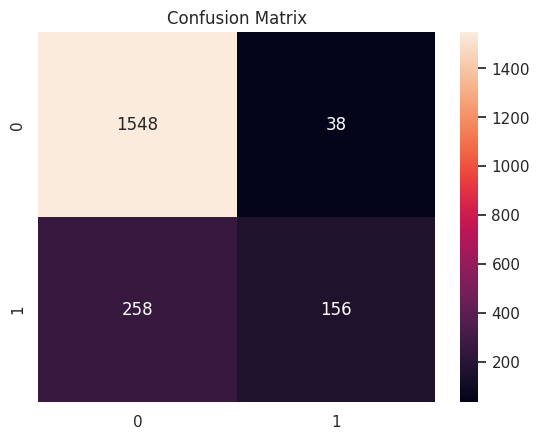

In [53]:
# Pola 
# | TP  | FP |
# | FN  | TN |
con_mat = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(con_mat, annot=True, fmt=".5g").set(title="Confusion Matrix");

In [54]:
# Kita bandingkan hasil prediksi model dengan nilai aktual
pd.DataFrame({
    "y_aktual": y_test,
    "y_pred": y_pred_grid
}).head(20)

,y_aktual,y_pred
2656,0,0
445,0,0
9505,0,0
332,0,0
4168,0,0
2364,0,0
6097,1,0
7,1,1
7752,0,0
4453,0,0


In [56]:
# Menggunakan Deep Learning
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)

model_deep = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(len(X_test.columns),)),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

optimizer = tf.keras.optimizers.Adam()
model_deep.compile(optimizer=optimizer,
              loss="binary_crossentropy", metrics=["acc"]              
)

history = model_deep.fit(X_train.values, y_train, validation_data=(X_test, y_test), callbacks=[es], epochs=100)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 87/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7599 - loss: 3.8337

I0000 00:00:1717005463.260221     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.7821 - loss: 2.4658 - val_acc: 0.7930 - val_loss: 0.5385
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7961 - loss: 0.5129 - val_acc: 0.7930 - val_loss: 0.4760
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8010 - loss: 0.4746 - val_acc: 0.7930 - val_loss: 0.4647
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7987 - loss: 0.4673 - val_acc: 0.7930 - val_loss: 0.4813
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8003 - loss: 0.4612 - val_acc: 0.8110 - val_loss: 0.4383
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8092 - loss: 0.4429 - val_acc: 0.8100 - val_loss: 0.4274
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8147 - loss: 0.4443 - val_acc: 0.8125 - val_loss: 0.4219
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8164 - loss: 0.4385 - val_acc: 0.8275 - val_loss: 0.4260
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 

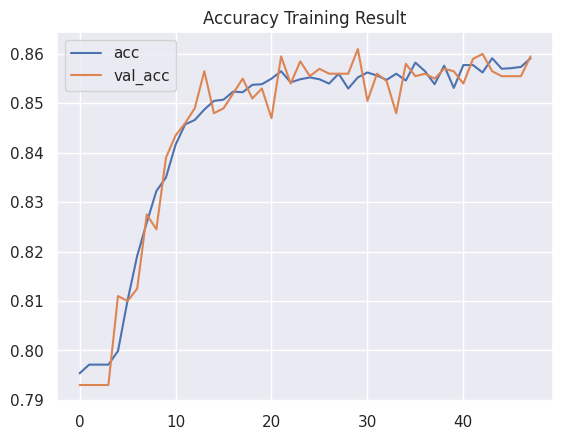

In [57]:
fig, ax = plt.subplots()
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
ax.set_title("Accuracy Training Result")
plt.legend();

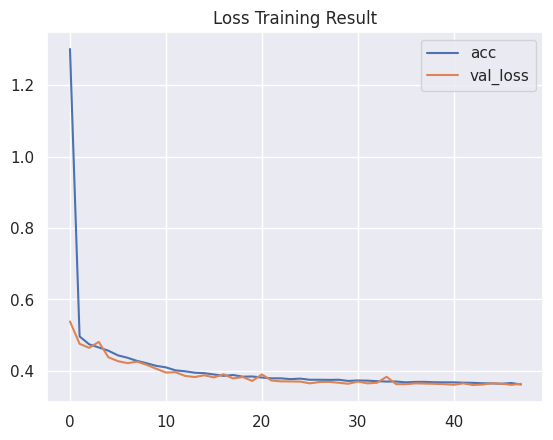

In [58]:
fig, ax = plt.subplots()
plt.plot(history.history["loss"], label="acc")
plt.plot(history.history["val_loss"], label="val_loss")
ax.set_title("Loss Training Result")
plt.legend();

In [59]:
# Kita tampilkan  model evaluasi akurasi dan loss dari hasil training
loss, acc_deep = model_deep.evaluate(X_test, y_test)
print(f"Loss = {loss}")
print(f"Accuracy = {acc_deep}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8524 - loss: 0.3683
Loss = 0.3639602065086365
Accuracy = 0.859499990940094


In [60]:
# Kita bandingkan accuracy antara model random forest grid dengan model deep learning
pd.DataFrame({
    "Random Forest Grid": [acc_grid],
    "Deep Learning": [acc_deep]
}, index=["accuracy"])

,Random Forest Grid,Deep Learning
accuracy,0.852,0.8595


In [61]:
y_pred_deep = model_deep.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [62]:
# Ubah bentuk array 2D kedalam array 1D (vektor)
y_pred_deep = y_pred_deep.round().flatten()
y_pred_deep

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [63]:
pd.DataFrame({
    "y_aktual":y_test,
    "y_pred_deep":y_pred_deep.astype("int32")
}).head(20)

,y_aktual,y_pred_deep
2656,0,0
445,0,0
9505,0,0
332,0,0
4168,0,0
2364,0,0
6097,1,0
7,1,1
7752,0,0
4453,0,0


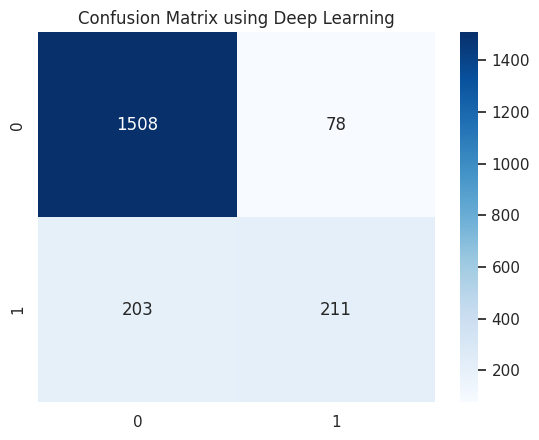

In [64]:
con_max_deep = confusion_matrix(y_test, y_pred_deep)
sns.heatmap(con_max_deep, annot=True, cmap="Blues", fmt=".5g").set(title="Confusion Matrix using Deep Learning");

In [65]:
pd.DataFrame({
    "y_aktual": y_test,
    "y_model_grid_random_forest": y_pred_grid,
    "y_pred_deep": y_pred_deep.astype("int32")
}).head(20)

,y_aktual,y_model_grid_random_forest,y_pred_deep
2656,0,0,0
445,0,0,0
9505,0,0,0
332,0,0,0
4168,0,0,0
2364,0,0,0
6097,1,0,0
7,1,1,1
7752,0,0,0
4453,0,0,0


In [66]:
# Kita bandingkan akurasi semua model yang sebelumnya sudah ada dengan model deep learning.
pd.DataFrame({
    "RandomForestClassifier": rf_acc,
    "LogisticRegression": lr_acc,
    "SVC": svc_acc,
    "GaussianNB": nb_acc,
    "KNeighborClassifier": kn_acc,
    "DecisionTreeClassifier": dt_acc,
    "Grid RandomForestClassifier": grid_acc,
    "DeepLearning": acc_deep
}, index=["accuracy"]).T.sort_values(by="accuracy", ascending=False)

,accuracy
DeepLearning,0.859500
Grid RandomForestClassifier,0.851000
RandomForestClassifier,0.692204
DecisionTreeClassifier,0.670579
KNeighborClassifier,0.634670
GaussianNB,0.597662
LogisticRegression,0.553446
SVC,0.540432
